In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
#导入数据，数据来源：百度、知乎、新浪财经、投资快报
df=pd.read_excel('2018关键词.xlsx')
df

,index,年度关键词,年度国内事件,年度国际事件,年度国民骄傲,年度全民热议,年度泪点事件,年度流行语,年度人工智能关键词,知乎年度新闻关键词,21世纪经济,新浪财经A股关键词,投资快报资本市场,房地产关键词
0,1,世界杯,台风山竹,中美贸易争端,中继星鹊桥发射,苹果发布会,汶川地震十周年,skr,机器人,逝去,四新经济,市值缩水28%,科创板,活下去
1,2,中美贸易争端,改革开放40周年,俄罗斯世界杯,IG夺冠,崔永元炮轰范冰冰,李咏去世,佛系,芯片,顺风车,股票质押,股民人均亏9.66万元,MSCI,慢下来
2,3,台风山竹,长生疫苗事件,哈里王子大婚,苏炳添6秒55,刘强东性侵风波,重庆公交坠江事故,大猪蹄子,物联网,偷税与减税,中长期资金,科创板,回购,城市运营
3,4,苹果发布会,港珠澳大桥通车,Facebook数据泄露,亚运会奖牌第一,乘网约车遇害,金庸去世,小奶狗,智能音箱,药神,A股国际化,历史最长的11连阳,独角兽,区域深耕
4,5,延禧攻略,全面取消限迁政策,普京宣誓就职,港珠澳大桥通车,高铁“霸座”事件,重庆幼儿园伤人事件,小姐姐,自动驾驶,问题疫苗,科创板,美股暴跌,沪伦通,借钱难
5,6,创造101,身份证新规施行,安南去世,武大靖破世界纪录,昆山反杀案,山东寿光洪灾,钢铁直男,人脸识别,躺赢,资管新规,全球贸易紧张,国资驰援,交房难
6,7,skr,央行开出亿级罚单,国际油价大幅下跌,国产航母出港,逃犯克星张学友,霍金去世,C位出道,量子计算,她有错吗,债市统一,股权质押危机,退市常态化,抢人大战
7,8,李咏去世,提高个税起征点,朝韩历史性会晤,中国人造太阳1亿度,抵制天价片酬声明,单田芳去世,渣渣辉,无人车,DG辱华,减少行政干预,A股继续扩容,重新上市,房租上涨
8,9,锦鲤,第四套币停止流通,哥伦比亚加入北约,最高成就奖邹市明,王思聪开奖,斯坦李去世,真香,世界人工智能大会,IG夺冠,全面从严监管,假疫苗事件,从严监管,产业运营能力
9,10,电竞,中国台湾花莲地震,沙特承认记者死亡,一箭六星发射成功,D&G辱华,小红莓主唱去世,官宣体,量子力学,杨超越,资本市场改革,茅台跌停,并购重组,产品力


In [3]:
text=[]
for col in df.columns[1:]:
    text=text+list((df[col].values))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\zjy\AppData\Local\Temp\jieba.cache
Loading model cost 1.297 seconds.
Prefix dict has been built succesfully.


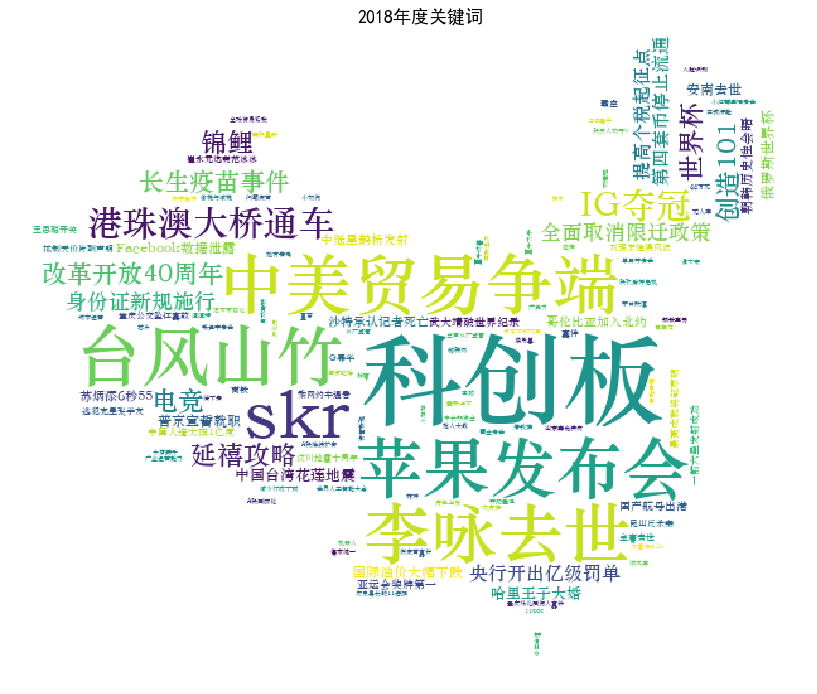

In [4]:
import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords=text
for word in stopwords:
    jieba.add_word(word)

word_list = [" ".join(jieba.cut(sentence)) for sentence in text]
new_text = ' '.join(word_list)

img = plt.imread("中国地图.jpg")
#设置词云格式
wc = WordCloud(background_color="white", 
     mask=img,#设置背景图片
     stopwords=STOPWORDS,# 设置停用词
     max_font_size=80, #字体最大值
     #random_state=42,  #颜色随机性
     #max_words=80, # 设置最大现实的字数          
     font_path='C:\Windows\Fonts\STZHONGS.TTF')
#font_path显示中文字体

#生成词云
wc.generate(new_text)
image_colors = ImageColorGenerator(img)
#设置图片大小

plt.figure(figsize=(14,12))
plt.imshow(wc)
plt.title('2018年度关键词',fontsize=18)
plt.axis("off")
plt.show()

In [5]:
from pyecharts import Funnel

attr = list(df.iloc[:,8].values)
value = [i for i in range(100,0,-10)]
funnel = Funnel("")
funnel.add("", attr, value, is_label_show=True,label_pos="inside",  label_text_color="#fff")

funnel

In [222]:
text2=[]
for col in df.columns[1:8]:
    text2=text2+list((df[col].values))
    
from pyecharts import WordCloud

name = set(text2)
np.random.seed(1)
value =np.random.randint(1,50,size=len(name))
wordcloud = WordCloud(width=900, height=650)
wordcloud.add("", name, value, word_size_range=[12, 50])

wordcloud

In [325]:
text3=[]
for col in df.columns[10:13]:
    text3=text3+list((df[col].values))
    
from pyecharts import WordCloud

name = set(text3)
np.random.seed(5)
value =np.random.randint(1,50,size=len(name))
wordcloud = WordCloud(width=900, height=600)
wordcloud.add("", name, value, word_size_range=[12, 50])

wordcloud

In [330]:
#获取数据函数
import tushare as ts
def get_data(code,start_date):
    df=ts.get_k_data(code,start_date)
    df.index=pd.to_datetime(df.date)
    return df
#计算日对数收益率
def log_ret(df):
    logret=np.log(df/df.shift(1))[1:]
    return logret
#将日收益率转换为月收益率
def month_rate(logret):
    date=[]
    d=list(logret.index)
    for i in range(0,np.size(logret)):
        t=''.join([d[i].strftime("%Y"),d[i].strftime("%m"),"01"])
        date.append(datetime.strptime(t,"%Y%m%d"))
    y=pd.DataFrame(logret.values,date,columns=['月收益率'])   
    ret_M=y.groupby(y.index).sum()
    return ret_M

#将日收益率转换为年收益率
def annual_rate(logret):
    year=[]
    d=list(logret.index)
    for i in range(0,len(logret)):
        year.append(d[i].strftime("%Y"))
    y=pd.DataFrame(logret.values,year)
    ret_Y=np.exp(y.groupby(y.index).sum())-1
    return ret_Y

In [337]:
codes=['sh','sz','hs300','sz50','zxb','cyb']
zs=pd.DataFrame()
for code in codes:
    zs[code]=get_data(code,'2011-01-01')['close']
#对数收益率
zs_log=log_ret(zs)
d1={'sh':'上证综指','sz':'深证综指','hs300':'沪深300','sz50':'上证50','zxb':'中小板','cyb':'创业板'}
zs_log.rename(columns=d1,inplace=True)
zs_Y=annual_rate(zs_log)
d2={0:'上证综指',1:'深证综指',2:'沪深300',3:'上证50',4:'中小板',5:'创业板'}
zs_Y.rename(columns=d2,inplace=True)

In [338]:
bar = Bar(" ")

attr = list(zs_Y.index)
v1 = list(((zs_Y['上证综指'].values)*100).round(2))
v2 = list(((zs_Y['深证综指'].values)*100).round(2))
v3 = list(((zs_Y['沪深300'].values)*100).round(2))
v4 = list(((zs_Y['上证50'].values)*100).round(2))
v5 = list(((zs_Y['中小板'].values)*100).round(2))
v6 = list(((zs_Y['创业板'].values)*100).round(2))

bar.add("上证综指(%)", attr, v1,)
bar.add("深证综指(%)", attr, v2, )
bar.add("沪深300(%)", attr, v3,)
bar.add("上证50(%)", attr, v4, )
bar.add("中小板(%)", attr, v5,)
bar.add("创业板(%)", attr, v6, )
bar

In [772]:
attr = ["美元指数", "德国债券", "日元/美元", "纳斯达克指数", "道琼斯指数", "美国债券","标普500指数",
       "CRD商品指数","MSCI货币指数","黄金","欧元/美元","日经225","布伦特原油","欧洲stoxx600","恒生指数",
       "WTI原油","MSCI新兴市场指数","上证综指","比特币"]
v =    [5.13, -0.59,-0.68, -1.37, -2.91,-3.28,-3.56,-3.69, -4.59, -5.02,-5.96, -6.11,-9.64,-10.59,-14.49,
        -15.27, -16.04, -22.54,-76.63]
df=pd.DataFrame(v,columns=['收益率'],index=attr)
df=df.sort_values('收益率')

#bar.add("", attr, v, is_label_show=True,is_splitline_show=False,
#       label_formatter='-{c}%',is_yaxis_show=False,label_text_size=13,
#       is_random=True,label_text_color='black')

bar = Bar("2018年全球资产收益情况",width=800, height=450,title_text_size=15,title_pos='center')
bar.add("",df.index ,df['收益率'] ,is_convert=True,is_label_show=True,
       label_pos="left",is_splitline_show=False,is_random=True,label_text_color='black',
       label_formatter='{b}：{c}%',is_yaxis_show=False,is_xaxis_show=False)

bar

In [701]:
def get_data(code,start_date,end_date):
    df=ts.get_k_data(code, start=start_date, end=end_date)
    df.index=pd.to_datetime(df.date)
    df['logret']=np.log(df['close']/df['close'].shift(1))
    return df

stocks={'长生生物':'002680','中弘股份':'000979','乐视网':'300104','*ST百特':'002323',
      '罗平锌电':'002114','天圣制药':'002872','华业资本':'600240','坚瑞沃能':'300116'}
#'浦发银行':'600000','国信证券':'002736',
start_date='2018-01-01'
end_date='2018-12-28'
all_data={}
for name,code in stocks.items():
    all_data[name]=get_data(code,start_date,end_date)

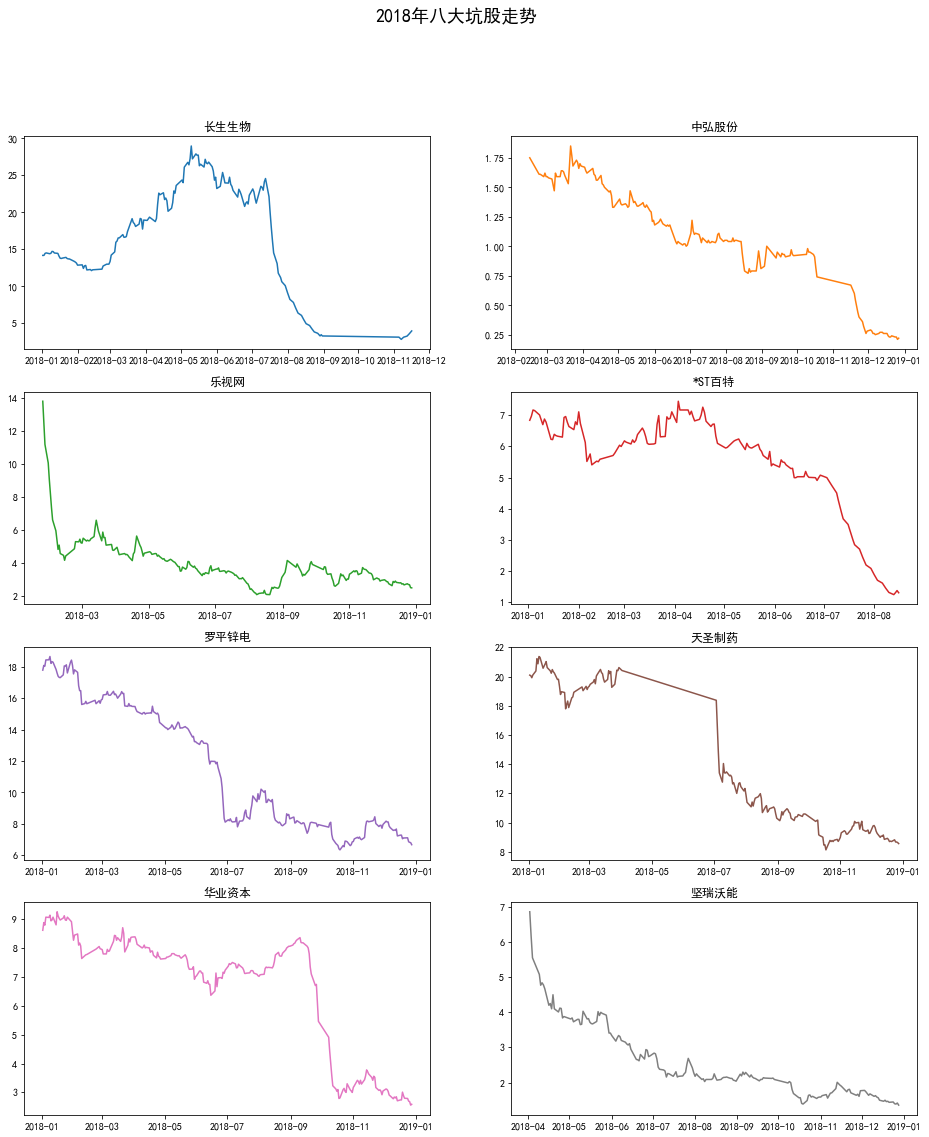

In [360]:
#对股价走势进行可视化
names =list(stocks.keys())
codes=list(stocks.values())

plot_pos = [421,422,423,424,425,426,427,428] # 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,18))
fig.suptitle('2018年八大坑股走势',fontsize=18)
for i in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[i]) 
    y_data =all_data[names[i]]['close'] 
    b = ax.plot(y_data,color=new_colors[i])   
    ax.set_title(names[i])    
plt.show()  

In [413]:
def get_ret(name,start_date=0):
    df=all_data[name]['close']
    if start_date!=0:
        r=(df.iloc[-1]-df.loc[start_date])/df.loc[start_date]
    else:   
        r=(df.iloc[-1]-df.iloc[0])/df.iloc[0]
    return r

In [415]:
#长生生物：假疫苗事件：7月15日
get_ret('长生生物',start_date='2018-07-16')

-0.8217194570135746

In [416]:
#中弘股份：逾期债务近百亿“面值退市第一股”
get_ret('中弘股份')

-0.8742857142857143

In [417]:
#乐视网(300104)——净资产为负债务高达80亿元面临退市考验
get_ret('乐视网')

-0.8195652173913044

In [418]:
#　*ST百特(002323)——因重大违法面临强制退市
get_ret('*ST百特')

-0.8084795321637426

In [419]:
#罗平锌电(002114)——央视曝光环境污染触目惊心
get_ret('罗平锌电')

-0.6256323777403036

In [420]:
#天圣制药(002872)——核心高管集体团灭
get_ret('天圣制药')

-0.5741929065313635

In [421]:
#华业资本(600240)——爆百亿萝卜章骗局
get_ret('华业资本')

-0.6993266775017414

In [422]:
#坚瑞沃能(300116)——负债205亿破产在即
get_ret('坚瑞沃能')

-0.8017492711370262

In [757]:
from pyecharts import Bar
attr = ['中弘股份','长生生物','乐视网','*ST百特','坚瑞沃能',
        '华业资本','罗平锌电','天圣制药']
v = [87.43,82.17,81.96,80.85,80.17,69.93,62.56,57.42]
bar = Bar("2018年八大坑股收益率",width=630, height=350,title_text_size=15,title_pos='center')
bar.add("", attr, v, is_label_show=True,is_splitline_show=False,
       label_formatter='-{c}%',is_yaxis_show=False,label_text_size=13,
       is_random=True,label_text_color='black')
#is_label_show=True,
#is_yaxis_show=False,
#is_convert=True,
#label_pos="inside",
bar

In [722]:
sh=get_data('sh',start_date='2018-01-01',end_date='2018-12-28')

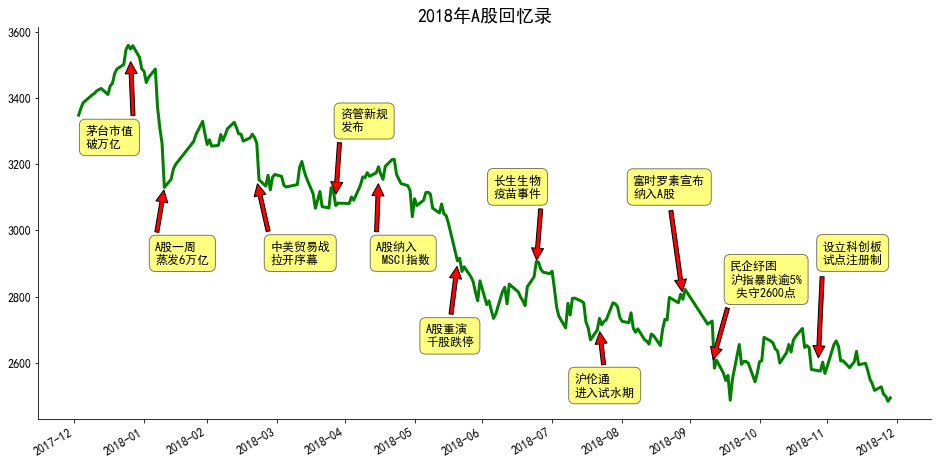

In [612]:
sh['close'].plot(figsize=(16,8),color='g',linewidth=3)
my_ticks = pd.date_range('2017-12-30','2018-12-31',freq='m')
plt.title('2018年A股回忆录',fontsize=18)
plt.xticks(my_ticks,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('',fontsize=15)
# 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')    
#大事记
#1
plt.annotate('茅台市值\n破万亿',
   xy=('2018-01-25',3520),xytext=('2018-01-05',3250), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)
#2
plt.annotate('A股一周\n蒸发6万亿',
   xy=('2018-02-09',3130),xytext=('2018-02-05',2900), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#3
plt.annotate('中美贸易战\n拉开序幕',
   xy=('2018-03-22',3150),xytext=('2018-03-28',2900), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#4
plt.annotate('资管新规\n发布',
   xy=('2018-04-26',3100),xytext=('2018-04-28',3300), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#5
plt.annotate('A股纳入\n MSCI指数',
   xy=('2018-05-15',3150),xytext=('2018-05-14',2900), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#6
plt.annotate('A股重演\n千股跌停',
   xy=('2018-06-19',2900),xytext=('2018-06-05',2650), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#7
plt.annotate('长生生物\n疫苗事件',
   xy=('2018-07-24',2900),xytext=('2018-07-05',3100), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#8
plt.annotate('沪伦通\n进入试水期',
   xy=('2018-08-21',2700),xytext=('2018-08-10',2500), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#9
plt.annotate('富时罗素宣布\n纳入A股',
   xy=('2018-09-27',2800),xytext=('2018-09-5',3100), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#10
plt.annotate('民企纾困\n沪指暴跌逾5%\n 失守2600点',
   xy=('2018-10-10',2600),xytext=('2018-10-18',2800), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#11
plt.annotate('设立科创板\n试点注册制',
   xy=('2018-11-26',2600),xytext=('2018-11-28',2900), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

#12
plt.annotate('A股纳入\n MSCI指数',
   xy=('2018-12-15',2400),xytext=('2018-12-25',2800), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=12)

plt.show()

In [670]:
import warnings
warnings.filterwarnings('ignore') 
# 不发出警告
from bokeh.io import output_notebook
output_notebook()
# 导入notebook绘图模块
from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
# 导入图表绘制、图标展示模块
# 导入ColumnDataSource模块
from bokeh.palettes import GnBu3, OrRd3
# 导入颜色模块

Loading BokehJS ...

In [633]:
attr = ["美元指数", "德国债券", "日元/美元", "纳斯达克指数", "道琼斯指数", "美国债券","标普500指数",
       "CRD商品指数","MSCI货币指数","黄金","欧元/美元","日经225","布伦特原油","欧洲stoxx600","恒生指数",
       "WTI原油","MSCI新兴市场指数","上证综指","比特币"]
v =    [5.13, -0.59,-0.68, -1.37, -2.91,-3.28,-3.56,-3.69, -4.59, -5.02,-5.96, -6.11,-9.64,-10.59,-14.49,
        -15.27, -16.04, -22.54,-76.63]
df=pd.DataFrame(v,columns=['收益率'],index=attr)
df=df.sort_values('收益率')

In [678]:
p = figure(y_range=list(df.index),plot_width=500, plot_height=400, x_range=(-80, 8))
p.hbar(y=df.index, height=0.5, left=df['收益率'],right=0,  # y：纵轴坐标，height：厚度，left：左边最小值，right：右边最大值
       color = ['green']*18+['red'])
p.y_range.range_padding = 0.08     # 调整边界间隔
p.ygrid.grid_line_color = None  
p.xgrid.grid_line_color = None 
p.axis.minor_tick_line_color = None
p.outline_line_color = None
# 设置其他参数
show(p)